# Minimum Polygon Triangular


In [41]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [42]:
vector = list[float]
matrix = list[vector]

In [43]:
def distance(point1: tuple, point2: tuple) -> float:

    x1, y1 = point1
    return ((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)**0.5

In [44]:
def cost(point1: tuple, point2: tuple, point3: tuple) -> float:
    return distance(point1, point2) + distance(point2, point3) + distance(point3, point1)

In [45]:
def minTriangle(vertices: list, i: int, k: int, dp: matrix, triangular: matrix) -> float:
    if k - i < 2:
        return 0

    if dp[i][k] != -1:
        return dp[i][k]

    minCost = float('inf')
    for j in range(i + 1, k):
        c = cost(vertices[i], vertices[j], vertices[k])
        totalCost = c + \
            minTriangle(vertices, i, j, dp, triangular) + \
            minTriangle(vertices, j, k, dp, triangular)

        if totalCost < minCost:
            print(j)
            triangular[i][k] = j

    dp[i][k] = minCost
    return dp[i][k]

In [46]:
def readFile(path: str) -> list:
    with open(path, 'r') as f:
        nPoints = int(f.readline())
        points = []

        for _ in range(nPoints):
            points.append(tuple(map(float, f.readline().split())))

        return points

In [47]:
def plotTriangle(vertices: list, i: int, k: int, triangular: matrix, ax: plt.Axes):
    if k - i < 2:
        return

    j = triangular[i][k]

    # plot point
    ax.plot(vertices[i][0], vertices[i][1], 'ro')
    ax.plot(vertices[j][0], vertices[j][1], 'ro')
    ax.plot(vertices[k][0], vertices[k][1], 'ro')

    # Label point
    ax.text(vertices[i][0], vertices[i][1], f'{i}')
    ax.text(vertices[j][0], vertices[j][1], f'{j}')
    ax.text(vertices[k][0], vertices[k][1], f'{k}')
    # plt.show()

    # plot line
    ax.plot([vertices[i][0], vertices[j][0]],
            [vertices[i][1], vertices[j][1]], 'r-')
    ax.plot([vertices[j][0], vertices[k][0]],
            [vertices[j][1], vertices[k][1]], 'r-')
    ax.plot([vertices[k][0], vertices[i][0]],
            [vertices[k][1], vertices[i][1]], 'r-')

    if j != -1:
        plotTriangle(vertices, i, j, triangular, ax)
        plotTriangle(vertices, j, k, triangular, ax)

In [48]:
def sortVerticesCounterClockwise(vertices):

    # Find mean point
    vertices = np.array(vertices)
    meanPoint = np.mean(vertices, axis=0)

    # Sort vertices counter clockwise
    temp = vertices - meanPoint
    angles = np.arctan2(temp[:, 1], temp[:, 0])

    sortedVertices = vertices[np.argsort(angles)]

    return sortedVertices

In [49]:
def printList(triangular, i, k):
    j = triangular[i][k]

    print(f'{i} {j} {k}')  # type: ignore

    if j != -1:
        printList(triangular, i, j)
        printList(triangular, j, k)

3
2
1
Min cost: inf
Time: 7.104873657226562e-05
Triangle: 
0 -1.0 4


TypeError: list indices must be integers or slices, not float

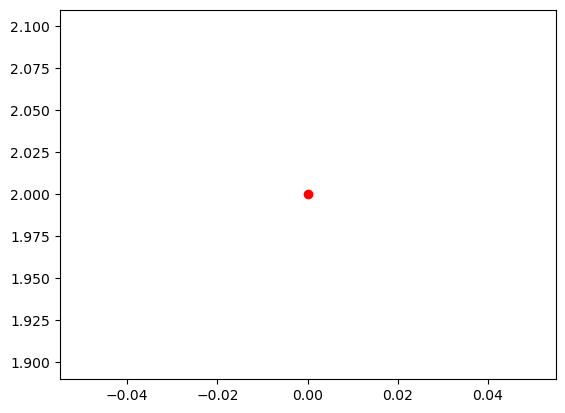

In [50]:
file_path = "./test/1.0.txt"

vertices = readFile(file_path)
dp = [[-1.0 for _ in range(len(vertices))]
      for _ in range(len(vertices))]

triangular = [[-1.0 for _ in range(len(vertices))]
              for _ in range(len(vertices))]

# vertices = sortVerticesCounterClockwise(vertices)

start = time.time()
minCost = minTriangle(vertices, 0, len(vertices) - 1, dp, triangular)
end = time.time()


print(f"Min cost: {minCost}")
print(f"Time: {end - start}")
print(f"Triangle: ")

printList(triangular, 0, len(vertices) - 1)


# Center spine
fig, ax = plt.subplots()


# plotTriangle(vertices, 0, len(vertices) - 1, triangular, ax)